In [295]:
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [314]:
hack = pd.read_csv('/Users/ky.kee/Desktop/hack.csv')

In [315]:
hack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700325 entries, 0 to 700324
Data columns (total 36 columns):
Greenwald_fraction        681495 non-null float64
Mirnov                    425160 non-null float64
Te_width                  477444 non-null float64
Wmhd                      700207 non-null float64
beta_n                    698087 non-null float64
beta_p                    700207 non-null float64
dipprog_dt                670010 non-null float64
intentional_disruption    233068 non-null float64
ip                        700226 non-null float64
ip_error                  673019 non-null float64
kappa                     700199 non-null float64
li                        700207 non-null float64
lower_gap                 700207 non-null float64
n_e                       699329 non-null float64
n_equal_1_mode            694264 non-null float64
n_equal_1_normalized      694264 non-null float64
n_over_ncrit              699862 non-null float64
p_icrf                    700325 non-nu

In [240]:
#DFHack= hackDf[['Greenwald_fraction', 'time_until_disrupt','time','beta_p','Te_width','Wmhd','radiated_fraction','v_loop','shot','q95','li','intentional_disruption','n_equal_1_normalized']]
#print(DFHack.isnull().sum())

In [316]:
print(hack.isnull().sum())

Greenwald_fraction         18830
Mirnov                    275165
Te_width                  222881
Wmhd                         118
beta_n                      2238
beta_p                       118
dipprog_dt                 30315
intentional_disruption    467257
ip                            99
ip_error                   27306
kappa                        126
li                           118
lower_gap                    118
n_e                          996
n_equal_1_mode              6061
n_equal_1_normalized        6061
n_over_ncrit                 463
p_icrf                         0
p_lh                           0
p_oh                        2327
p_rad                       3771
q0                           118
q95                          133
qstar                        126
radiated_fraction           6098
shot                           0
ssep                         118
time                           0
time_until_disrupt        480522
upper_gap                    118
v_loop    

In [317]:
hack.describe()

,Greenwald_fraction,Mirnov,Te_width,Wmhd,beta_n,beta_p,dipprog_dt,intentional_disruption,ip,ip_error,...,ssep,time,time_until_disrupt,upper_gap,v_loop,v_z,z_error,z_times_v_z,zcur,ip_sign
count,6.814950e+05,425160.000000,477444.000000,7.002070e+05,698087.000000,700207.000000,6.700100e+05,233068.000000,7.002260e+05,6.730190e+05,...,700207.000000,700325.000000,219803.000000,700207.000000,698112.000000,482837.000000,482837.000000,482837.000000,482837.000000,700226.000000
mean,5.332006e+15,3.019252,0.146643,3.475279e+04,-0.578212,0.287838,8.342563e+04,0.021466,7.420925e+05,-2.849137e+03,...,0.063481,0.955378,0.613173,0.109029,1.317212,0.266252,0.000607,0.174202,-0.006287,-0.336091
std,1.019456e+18,10.163689,0.056101,1.466346e+06,561.321425,68.631832,1.360526e+06,0.144932,2.291902e+05,4.746877e+04,...,0.195993,0.539758,0.510387,0.032993,1.945292,24.271281,0.023719,34.322512,0.024780,0.941830
min,0.000000e+00,0.000000,0.024193,-2.502276e+08,-308304.125000,-5672.447266,-9.999830e+07,0.000000,1.378778e+04,-1.065234e+06,...,-0.617917,0.060000,-0.098100,0.000000,-62.859375,-8885.710938,-4.467843,-573.107727,-4.487844,-1.000000
25%,1.748589e-01,0.992987,0.131936,1.221735e+04,0.177720,0.113867,0.000000e+00,0.000000,5.909677e+05,-1.793600e+04,...,-0.017095,0.480000,0.122100,0.092701,0.515347,-1.812926,-0.000912,-0.012393,-0.010987,-1.000000
50%,2.286218e-01,1.301409,0.144289,2.585039e+04,0.278773,0.164272,0.000000e+00,0.000000,7.859743e+05,-2.595875e+03,...,-0.009364,0.940000,0.536700,0.105217,1.157104,0.020501,-0.000075,0.000145,-0.008208,-1.000000
75%,3.007238e-01,2.385729,0.158159,4.236590e+04,0.396822,0.237124,0.000000e+00,0.000000,8.873978e+05,1.339347e+04,...,0.021267,1.420000,1.021300,0.116801,1.780333,1.876006,0.000839,0.014011,-0.002103,1.000000
max,3.749301e+20,729.332243,16.018305,9.890326e+08,173177.140625,54059.589844,1.499975e+08,1.000000,1.782824e+06,1.173938e+06,...,6.975819,2.400000,2.055900,0.939569,72.411133,3949.652588,1.306657,17652.521484,1.304535,1.000000


In [318]:
#remove 1 - intentional disruption indicator
hack_intD = hack[hack.intentional_disruption != 1]

In [319]:
hack['intentional_disruption'].isnull().sum()

467257

In [320]:
hack["ssep"].fillna(hack["ssep"].mean(), inplace=True)
hack["Wmhd"].fillna(hack["Wmhd"].mean(), inplace=True)
hack["beta_n"].fillna(hack["beta_n"].mean(), inplace=True)
hack["beta_p"].fillna(hack["beta_p"].mean(), inplace=True)
hack["ip"].fillna(hack["ip"].mean(), inplace=True)
hack["ip_error"].fillna(hack["ip_error"].mean(), inplace=True)
hack["kappa"].fillna(hack["kappa"].mean(), inplace=True)
hack["li"].fillna(hack["li"].mean(), inplace=True)
hack["lower_gap"].fillna(hack["lower_gap"].mean(), inplace=True)
hack["n_e"].fillna(hack["n_e"].mean(), inplace=True)
hack["n_equal_1_mode"].fillna(hack["n_equal_1_mode"].mean(), inplace=True)
hack["n_equal_1_normalized"].fillna(hack["n_equal_1_normalized"].mean(), inplace=True)
hack["n_over_ncrit"].fillna(hack["n_over_ncrit"].mean(), inplace=True)
hack["p_oh"].fillna(hack["p_oh"].mean(), inplace=True)
hack["p_rad"].fillna(hack["p_rad"].mean(), inplace=True)
hack["q0"].fillna(hack["q0"].mean(), inplace=True)
hack["q95"].fillna(hack["q95"].mean(), inplace=True)
hack["qstar"].fillna(hack["qstar"].mean(), inplace=True)
hack["radiated_fraction"].fillna(hack["radiated_fraction"].mean(), inplace=True)
hack["v_loop"].fillna(hack["v_loop"].mean(), inplace=True)
hack["v_z"].fillna(hack["v_z"].mean(), inplace=True)
hack["z_error"].fillna(hack["z_error"].mean(), inplace=True)
hack["z_times_v_z"].fillna(hack["z_times_v_z"].mean(), inplace=True)
hack["zcur"].fillna(hack["zcur"].mean(), inplace=True)
hack["ip_sign"].fillna(hack["ip_sign"].mean(), inplace=True)
hack["upper_gap"].fillna(hack["upper_gap"].mean(), inplace=True)
hack["dipprog_dt"].fillna(hack["dipprog_dt"].mean(), inplace=True)
hack["Te_width"].fillna(hack["Te_width"].mean(), inplace=True)
hack["Mirnov"].fillna(hack["Mirnov"].mean(), inplace=True)
hack["Greenwald_fraction"].fillna(hack["Greenwald_fraction"].mean(), inplace=True)

In [321]:
hack.describe()

,Greenwald_fraction,Mirnov,Te_width,Wmhd,beta_n,beta_p,dipprog_dt,intentional_disruption,ip,ip_error,...,ssep,time,time_until_disrupt,upper_gap,v_loop,v_z,z_error,z_times_v_z,zcur,ip_sign
count,7.003250e+05,700325.000000,700325.000000,7.003250e+05,700325.000000,700325.000000,7.003250e+05,233068.000000,7.003250e+05,7.003250e+05,...,700325.000000,700325.000000,219803.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000
mean,5.332006e+15,3.019252,0.146643,3.475279e+04,-0.578212,0.287838,8.342563e+04,0.021466,7.420925e+05,-2.849137e+03,...,0.063481,0.955378,0.613173,0.109029,1.317212,0.266252,0.000607,0.174202,-0.006287,-0.336091
std,1.005657e+18,7.919131,0.046322,1.466223e+06,560.423810,68.626050,1.330753e+06,0.144932,2.291740e+05,4.653415e+04,...,0.195976,0.539758,0.510387,0.032990,1.942216,20.153154,0.019695,28.498985,0.020576,0.941763
min,0.000000e+00,0.000000,0.024193,-2.502276e+08,-308304.125000,-5672.447266,-9.999830e+07,0.000000,1.378778e+04,-1.065234e+06,...,-0.617917,0.060000,-0.098100,0.000000,-62.859375,-8885.710938,-4.467843,-573.107727,-4.487844,-1.000000
25%,1.763162e-01,1.171615,0.138240,1.222011e+04,0.176328,0.113882,0.000000e+00,0.000000,5.909999e+05,-1.710938e+04,...,-0.017094,0.480000,0.122100,0.092703,0.518124,-0.912811,-0.000498,-0.004755,-0.009736,-1.000000
50%,2.317109e-01,3.019252,0.146643,2.585408e+04,0.278246,0.164285,0.000000e+00,0.000000,7.859472e+05,-2.849137e+03,...,-0.009360,0.940000,0.536700,0.105220,1.160583,0.266252,0.000607,0.011863,-0.006287,-1.000000
75%,3.104399e-01,3.019252,0.150758,4.236054e+04,0.396174,0.237190,0.000000e+00,0.000000,8.873654e+05,1.256500e+04,...,0.021352,1.420000,1.021300,0.116799,1.777588,0.967081,0.000607,0.174202,-0.005340,1.000000
max,3.749301e+20,729.332243,16.018305,9.890326e+08,173177.140625,54059.589844,1.499975e+08,1.000000,1.782824e+06,1.173938e+06,...,6.975819,2.400000,2.055900,0.939569,72.411133,3949.652588,1.306657,17652.521484,1.304535,1.000000


In [230]:
#hack[np.isnan(hack['intentional_disruption'])]=2
#hack[np.isnan(hack['time_until_disrupt'])]=1

In [212]:
#hack_1 = hack.drop(columns=['ip_error_frac'])

In [322]:
print(hack.isnull().sum())

Greenwald_fraction             0
Mirnov                         0
Te_width                       0
Wmhd                           0
beta_n                         0
beta_p                         0
dipprog_dt                     0
intentional_disruption    467257
ip                             0
ip_error                       0
kappa                          0
li                             0
lower_gap                      0
n_e                            0
n_equal_1_mode                 0
n_equal_1_normalized           0
n_over_ncrit                   0
p_icrf                         0
p_lh                           0
p_oh                           0
p_rad                          0
q0                             0
q95                            0
qstar                          0
radiated_fraction              0
shot                           0
ssep                           0
time                           0
time_until_disrupt        480522
upper_gap                      0
v_loop    

In [323]:
# Variable_1 - ip_error_frac
hack['ip_error_frac'] = (hack['ip'] - hack['ip_error'])/hack['ip']
hack['ip_error_frac'].head(5)

0    1.008773
1    1.006702
2    1.005578
3    0.992830
4    1.026096
Name: ip_error_frac, dtype: float64

In [332]:
std_scale = preprocessing.StandardScaler().fit(hack[['Greenwald_fraction','shot','Te_width','q95','li','radiated_fraction','v_loop','Wmhd','n_equal_1_normalized','ip_error_frac']])
df_std = std_scale.transform(hack[['Greenwald_fraction','shot','Te_width','q95','li','radiated_fraction','v_loop','Wmhd','n_equal_1_normalized','ip_error_frac']])

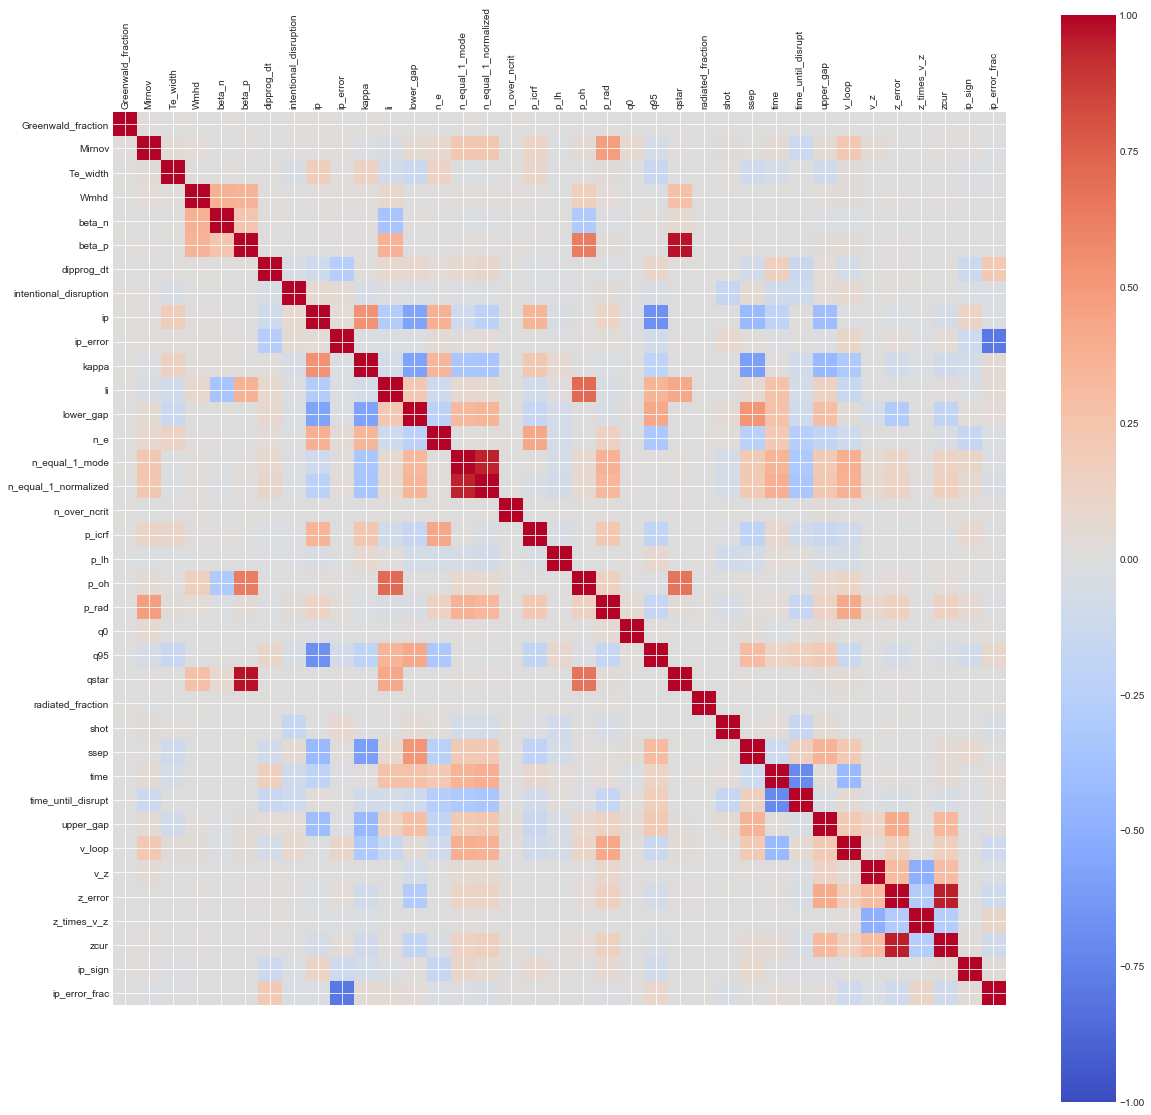

In [328]:
corr = hack.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(hack.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,20)
ax.set_yticks(ticks)
ax.set_xticklabels(hack.columns)
ax.set_yticklabels(hack.columns)
plt.show()

In [326]:
explore = hack.sort_values(['shot','time_until_disrupt'],ascending=[1,1])
print(explore).describe()

        Greenwald_fraction    Mirnov  Te_width          Wmhd    beta_n  \
0                 0.106746  0.854361  0.146643 -21089.234375 -0.698649   
1                 0.114471  0.896634  0.146643 -15787.280273 -0.375650   
2                 0.125156  0.991508  0.146643 -10055.614258 -0.188591   
3                 0.155501  5.244929  0.146643 -11733.971680 -0.183073   
4                 0.132389  6.245146  0.146643  -4083.808594 -0.057869   
5                 0.139260  5.262557  0.146643  -1063.650391 -0.013332   
6                 0.138811  0.807186  0.146643   2680.039795  0.031658   
7                 0.144662  0.944301  0.146643   5963.188965  0.068277   
8                 0.153906  1.092591  0.146643   6711.934082  0.075340   
9                 0.136080  1.023663  0.146643   7382.337891  0.080851   
10                0.107892  1.075381  0.146643   7629.673828  0.081691   
11                0.097144  1.174083  0.146643   4910.808105  0.051340   
12                0.085028  1.113669  

AttributeError: 'NoneType' object has no attribute 'describe'

In [333]:
hack.describe()

,Greenwald_fraction,Mirnov,Te_width,Wmhd,beta_n,beta_p,dipprog_dt,intentional_disruption,ip,ip_error,...,time,time_until_disrupt,upper_gap,v_loop,v_z,z_error,z_times_v_z,zcur,ip_sign,ip_error_frac
count,7.003250e+05,700325.000000,700325.000000,7.003250e+05,700325.000000,700325.000000,7.003250e+05,233068.000000,7.003250e+05,7.003250e+05,...,700325.000000,219803.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000
mean,5.332006e+15,3.019252,0.146643,3.475279e+04,-0.578212,0.287838,8.342563e+04,0.021466,7.420925e+05,-2.849137e+03,...,0.955378,0.613173,0.109029,1.317212,0.266252,0.000607,0.174202,-0.006287,-0.336091,1.005108
std,1.005657e+18,7.919131,0.046322,1.466223e+06,560.423810,68.626050,1.330753e+06,0.144932,2.291740e+05,4.653415e+04,...,0.539758,0.510387,0.032990,1.942216,20.153154,0.019695,28.498985,0.020576,0.941763,0.133007
min,0.000000e+00,0.000000,0.024193,-2.502276e+08,-308304.125000,-5672.447266,-9.999830e+07,0.000000,1.378778e+04,-1.065234e+06,...,0.060000,-0.098100,0.000000,-62.859375,-8885.710938,-4.467843,-573.107727,-4.487844,-1.000000,-9.118735
25%,1.763162e-01,1.171615,0.138240,1.222011e+04,0.176328,0.113882,0.000000e+00,0.000000,5.909999e+05,-1.710938e+04,...,0.480000,0.122100,0.092703,0.518124,-0.912811,-0.000498,-0.004755,-0.009736,-1.000000,0.983942
50%,2.317109e-01,3.019252,0.146643,2.585408e+04,0.278246,0.164285,0.000000e+00,0.000000,7.859472e+05,-2.849137e+03,...,0.940000,0.536700,0.105220,1.160583,0.266252,0.000607,0.011863,-0.006287,-1.000000,1.004023
75%,3.104399e-01,3.019252,0.150758,4.236054e+04,0.396174,0.237190,0.000000e+00,0.000000,8.873654e+05,1.256500e+04,...,1.420000,1.021300,0.116799,1.777588,0.967081,0.000607,0.174202,-0.005340,1.000000,1.023067
max,3.749301e+20,729.332243,16.018305,9.890326e+08,173177.140625,54059.589844,1.499975e+08,1.000000,1.782824e+06,1.173938e+06,...,2.400000,2.055900,0.939569,72.411133,3949.652588,1.306657,17652.521484,1.304535,1.000000,10.451964


In [344]:
explore = hack.sort_values(['shot','time_until_disrupt','ip_error_frac'],ascending=[1,1,1])

In [345]:
display(explore.head())

,Greenwald_fraction,Mirnov,Te_width,Wmhd,beta_n,beta_p,dipprog_dt,intentional_disruption,ip,ip_error,...,time,time_until_disrupt,upper_gap,v_loop,v_z,z_error,z_times_v_z,zcur,ip_sign,ip_error_frac
16,0.151900,0.708062,0.146643,13486.817383,0.135813,0.077807,-314468.125,NaN,768961.7500,11855.8750,...,0.38,NaN,0.113652,0.272831,0.266252,0.000607,0.174202,-0.006287,-1.0,0.984582
17,0.171852,0.805292,0.146643,19246.796875,0.188913,0.107879,-314468.125,NaN,779909.5000,7197.4375,...,0.40,NaN,0.111586,2.117520,0.266252,0.000607,0.174202,-0.006287,-1.0,0.990771
11,0.097144,1.174083,0.146643,4910.808105,0.051340,0.031280,-1098889.125,NaN,741398.0625,6404.1250,...,0.28,NaN,0.113232,1.947443,0.266252,0.000607,0.174202,-0.006287,-1.0,0.991362
3,0.155501,5.244929,0.146643,-11733.971680,-0.183073,-0.116469,-1098908.125,NaN,567906.0000,4072.0000,...,0.12,NaN,0.147233,4.524800,0.266252,0.000607,0.174202,-0.006287,-1.0,0.992830
10,0.107892,1.075381,0.146643,7629.673828,0.081691,0.051269,-1098904.000,NaN,722454.0000,3370.1875,...,0.26,NaN,0.117733,1.906433,0.266252,0.000607,0.174202,-0.006287,-1.0,0.995335


In [346]:
explore.describe()

,Greenwald_fraction,Mirnov,Te_width,Wmhd,beta_n,beta_p,dipprog_dt,intentional_disruption,ip,ip_error,...,time,time_until_disrupt,upper_gap,v_loop,v_z,z_error,z_times_v_z,zcur,ip_sign,ip_error_frac
count,7.003250e+05,700325.000000,700325.000000,7.003250e+05,700325.000000,700325.000000,7.003250e+05,233068.000000,7.003250e+05,7.003250e+05,...,700325.000000,219803.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000,700325.000000
mean,5.332006e+15,3.019252,0.146643,3.475279e+04,-0.578212,0.287838,8.342563e+04,0.021466,7.420925e+05,-2.849137e+03,...,0.955378,0.613173,0.109029,1.317212,0.266252,0.000607,0.174202,-0.006287,-0.336091,1.005108
std,1.005657e+18,7.919131,0.046322,1.466223e+06,560.423810,68.626050,1.330753e+06,0.144932,2.291740e+05,4.653415e+04,...,0.539758,0.510387,0.032990,1.942216,20.153154,0.019695,28.498985,0.020576,0.941763,0.133007
min,0.000000e+00,0.000000,0.024193,-2.502276e+08,-308304.125000,-5672.447266,-9.999830e+07,0.000000,1.378778e+04,-1.065234e+06,...,0.060000,-0.098100,0.000000,-62.859375,-8885.710938,-4.467843,-573.107727,-4.487844,-1.000000,-9.118735
25%,1.763162e-01,1.171615,0.138240,1.222011e+04,0.176328,0.113882,0.000000e+00,0.000000,5.909999e+05,-1.710938e+04,...,0.480000,0.122100,0.092703,0.518124,-0.912811,-0.000498,-0.004755,-0.009736,-1.000000,0.983942
50%,2.317109e-01,3.019252,0.146643,2.585408e+04,0.278246,0.164285,0.000000e+00,0.000000,7.859472e+05,-2.849137e+03,...,0.940000,0.536700,0.105220,1.160583,0.266252,0.000607,0.011863,-0.006287,-1.000000,1.004023
75%,3.104399e-01,3.019252,0.150758,4.236054e+04,0.396174,0.237190,0.000000e+00,0.000000,8.873654e+05,1.256500e+04,...,1.420000,1.021300,0.116799,1.777588,0.967081,0.000607,0.174202,-0.005340,1.000000,1.023067
max,3.749301e+20,729.332243,16.018305,9.890326e+08,173177.140625,54059.589844,1.499975e+08,1.000000,1.782824e+06,1.173938e+06,...,2.400000,2.055900,0.939569,72.411133,3949.652588,1.306657,17652.521484,1.304535,1.000000,10.451964


In [357]:
print(explore.isnull().sum())

Greenwald_fraction        0
Mirnov                    0
Te_width                  0
Wmhd                      0
beta_n                    0
beta_p                    0
dipprog_dt                0
intentional_disruption    0
ip                        0
ip_error                  0
kappa                     0
li                        0
lower_gap                 0
n_e                       0
n_equal_1_mode            0
n_equal_1_normalized      0
n_over_ncrit              0
p_icrf                    0
p_lh                      0
p_oh                      0
p_rad                     0
q0                        0
q95                       0
qstar                     0
radiated_fraction         0
shot                      0
ssep                      0
time                      0
time_until_disrupt        0
upper_gap                 0
v_loop                    0
v_z                       0
z_error                   0
z_times_v_z               0
zcur                      0
ip_sign             

In [354]:
explore['time_until_disrupt'].fillna(1, inplace=True)

In [356]:
explore['intentional_disruption'].fillna(1, inplace=True)

In [358]:
explore.to_csv("hack_clean1.csv", index=False, encoding='utf8')